# Data Wrangling Project: WeRateDogs tweets 🐶

### Project Details

The goal: 

- To wrangle WeRateDogs Twitter data to create analyses and visualizations.

The steps:

- Data wrangling
    - Gathering data
    - Assessing data
    - Cleaning data
- Storing, analyzing, and visualizing the wrangled data
- Reporting on the data wrangling efforts, data analyses and visualizations

## Gathering data

In [1]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import pandas as pd
import requests
import os
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### WeRateDogs Twitter archive

Importing the WeRateDogs Twitter archive as a dataframe from a previously given csv file.

In [2]:
#DataFrame with the twitter_archive_enhanced.csv file
df_1 = pd.read_csv('twitter-archive-enhanced.csv')
df_1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

2356

### Twitter API

- Using the tweet IDs in the WeRateDogs Twitter archive, querying the Twitter API for each tweet's JSON data using Python's Tweepy library and storing each tweet's entire set of JSON data in a file called tweet_json.txt file. 
- Each tweet's JSON data is written to its own line. Reading the .txt file line by line into a pandas DataFrame. 
- Note: Twitter API keys, secrets, and tokens are hidden.

In [7]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [10]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 30-40 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Rate limit reached. Sleeping for: 548


Fail
902: 758474966123810816
Success
903: 758467244762497024
Success
904: 758405701903519748
Success
905: 758355060040593408
Success
906: 758099635764359168
Success
907: 758041019896193024
Success
908: 757741869644341248
Success
909: 757729163776290825
Success
910: 757725642876129280
Success
911: 757611664640446465
Success
912: 757597904299253760
Success
913: 757596066325864448
Success
914: 757400162377592832
Success
915: 757393109802180609
Success
916: 757354760399941633
Success
917: 756998049151549440
Success
918: 756939218950160384
Success
919: 756651752796094464
Success
920: 756526248105566208
Success
921: 756303284449767430
Success
922: 756288534030475264
Success
923: 756275833623502848
Success
924: 755955933503782912
Success
925: 755206590534418437
Success
926: 755110668769038337
Success
927: 754874841593970688
Success
928: 754856583969079297
Success
929: 754747087846248448
Success
930: 754482103782404096
Success
931: 754449512966619136
Success
932: 754120377874386944
Success
933

Success
1154: 725729321944506368
Success
1155: 725458796924002305
Success
1156: 724983749226668032
Success
1157: 724771698126512129
Success
1158: 724405726123311104
Success
1159: 724049859469295616
Success
1160: 724046343203856385
Success
1161: 724004602748780546
Success
1162: 723912936180330496
Success
1163: 723688335806480385
Success
1164: 723673163800948736
Success
1165: 723179728551723008
Success
1166: 722974582966214656
Success
1167: 722613351520608256
Success
1168: 721503162398597120
Success
1169: 721001180231503872
Success
1170: 720785406564900865
Success
1171: 720775346191278080
Success
1172: 720415127506415616
Success
1173: 720389942216527872
Success
1174: 720340705894408192
Success
1175: 720059472081784833
Success
1176: 720043174954147842
Success
1177: 719991154352222208
Success
1178: 719704490224398336
Success
1179: 719551379208073216
Success
1180: 719367763014393856
Success
1181: 719339463458033665
Success
1182: 719332531645071360
Success
1183: 718971898235854848
Success
11

Success
1403: 699423671849451520
Success
1404: 699413908797464576
Success
1405: 699370870310113280
Success
1406: 699323444782047232
Success
1407: 699088579889332224
Success
1408: 699079609774645248
Success
1409: 699072405256409088
Success
1410: 699060279947165696
Success
1411: 699036661657767936
Success
1412: 698989035503689728
Success
1413: 698953797952008193
Success
1414: 698907974262222848
Success
1415: 698710712454139905
Success
1416: 698703483621523456
Success
1417: 698635131305795584
Success
1418: 698549713696649216
Success
1419: 698355670425473025
Success
1420: 698342080612007937
Success
1421: 698262614669991936
Success
1422: 698195409219559425
Success
1423: 698178924120031232
Success
1424: 697995514407682048
Success
1425: 697990423684476929
Success
1426: 697943111201378304
Success
1427: 697881462549430272
Success
1428: 697630435728322560
Success
1429: 697616773278015490
Success
1430: 697596423848730625
Success
1431: 697575480820686848
Success
1432: 697516214579523584
Success
14

Success
1652: 683498322573824003
Success
1653: 683481228088049664
Success
1654: 683462770029932544
Success
1655: 683449695444799489
Success
1656: 683391852557561860
Success
1657: 683357973142474752
Success
1658: 683142553609318400
Success
1659: 683111407806746624
Success
1660: 683098815881154561
Success
1661: 683078886620553216
Success
1662: 683030066213818368
Success
1663: 682962037429899265
Success
1664: 682808988178739200
Success
1665: 682788441537560576
Success
1666: 682750546109968385
Success
1667: 682697186228989953
Success
1668: 682662431982772225
Success
1669: 682638830361513985
Success
1670: 682429480204398592
Success
1671: 682406705142087680
Success
1672: 682393905736888321
Success
1673: 682389078323662849
Success
1674: 682303737705140231
Success
1675: 682259524040966145
Success
1676: 682242692827447297
Success
1677: 682088079302213632
Success
1678: 682059653698686977
Success
1679: 682047327939461121
Success
1680: 682032003584274432
Success
1681: 682003177596559360
Success
16

Rate limit reached. Sleeping for: 548


Fail
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
1812: 676819651066732545
Success
1813: 676811746707918848
Success
1814: 676776431406465024
Success
1815: 676617503762681856
Success
1816: 676613908052996102
Success
1817: 676606785097199616
Success
1818: 676603393314578432
Success
1819: 676593408224403456
Success
1820: 676590572941893632
Success
1821: 676588346097852417
Success
1822: 676582956622721024
Success
1823: 676575501977128964
Success
1824: 676533798876651520
Success
1825: 676496375194980353
Success
1826: 676470639084101634
Success
1827: 676440007570247681
Success
1828: 676430933382295552
Success
1829: 676263575653122048
Success
1830: 676237365392908289
Success
1831: 676219687039057920
Success
1832: 676215927814406144
Success
1833:

Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
2059: 671347597085433856
Success
2060: 671186162933985280
Success
2061: 671182547775299584
Success
2062: 671166507850801152
Success
2063: 671163268581498880
Success
2064: 671159727754231808
Success
2065: 671154572044468225
Success
2066: 671151324042559489
Success
2067: 671147085991960577
Success
2068: 671141549288370177
Success
2069: 671138694582165504
Success
2070: 671134062904504320
Success
2071: 671122204919246848
Success
2072: 671115716440031232
Success
2073: 671109016219725825
Success
2074: 670995969505435648
Success
2075: 670842764863651840
Success
2076: 670840546554966016
Success
2077: 670838202509447168
Success
2078: 670833812859932673
Success
2079: 670832455012716544
Success
2080: 670826280409919488
Success
2081: 670823764196741120
Success
20

Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
2308: 666826780179869698
Success
2309: 666817836334096384
Success
2310: 666804364988780544
Success
2311: 666786068205871104
Success
2312: 666781792255496192
Success
2313: 666776908487630848
Success
2314: 666739327293083650
Success
2315: 666701168228331520
Success
2316: 666691418707132416
Success
2317: 666649482315059201
Success
2318: 666644823164719104
Success
2319: 666454714377183233
Success
2320: 666447344410484738
Success
2321: 666437273139982337
Success
2322: 666435652385423360
Success
2323: 666430724426358785
Success
2324: 666428276349472768
Success
2325: 666421158376562688
Success
2326: 666418789513326592
Success
2327: 666411507551481857
Success
2328: 666407126856765440
Success
2329: 666396247373291520
Success
2330: 666373753744588802
Success
23

In [58]:
#total time 2099.897143721
#fails_dict = {888202515573088257: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 873697596434513921: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 872668790621863937: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 872261713294495745: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 869988702071779329: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 866816280283807744: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 861769973181624320: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 856602993587888130: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 851953902622658560: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 845459076796616705: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 844704788403113984: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 842892208864923648: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 837366284874571778: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 837012587749474308: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 829374341691346946: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 827228250799742977: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 812747805718642688: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 802247111496568832: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 779123168116150273: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 775096608509886464: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 771004394259247104: TweepError([{'code': 179, 'message': 'Sorry, you are not authorized to see this status.'}]), 770743923962707968: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 759566828574212096: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 758740312047005698: TweepError("Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=60)"), 754011816964026368: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 680055455951884288: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 676957860086095872: TweepError("Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=60)")}

In [4]:
#creating a dataframe from the tweet_json.txt file
data = []
with open('tweet_json.txt', 'r') as file: 
    for line in file:
      data.append(json.loads(line))

In [5]:
df_tweets = pd.DataFrame(data)

### Image predictions

The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

In [6]:
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

In [7]:
with open('image_predictions.tsv', 'w') as f: 
    f.write(r.text) 

In [8]:
image_pred = pd.read_csv('image_predictions.tsv', sep='\t')

## Assessing data

### Quality

**Data quality assessment:**

- Completeness: 
   - Do we have all of the records that we should? 
   - Do we have missing records or not? 
   - Are there specific rows, columns, or cells missing?
- Validity: 
    - We have the records, but they're not valid, i.e., they don't conform to a defined schema. A schema is a defined set of rules for data. These rules can be real-world constraints (e.g. negative height is impossible) and table-specific constraints (e.g. unique key constraints in tables).
- Accuracy: 
    - Inaccurate data is wrong data that is valid. It adheres to the defined schema, but it is still incorrect. Example: a patient's weight that is 5 lbs too heavy because the scale was faulty.
- Consistency: 
    - Inconsistent data is both valid and accurate, but there are multiple correct ways of referring to the same thing. Consistency, i.e., a standard format, in columns that represent the same data across tables and/or within tables is desired.

**Quality issues**
- df_1:
    - missing data in expanded_urls column for some of the tweets
    - some of the tweets are replies or retweets, which are indicated with in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp columns.
    - timestamp should have datetime as dtype
    - name, doggo, floofer, pupper and puppo columns have missing values as a string 'None' which means these values don't show up as NaN or null values
    - columns not needed: in_reply_to_status_id, in_reply_to_user_id, source, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls       
- df_tweets:
    - 2329 tweets, missing 27 tweets compared to the original archive file (df_1)
    - missing data in following columns: extended_entities, geo, coordinates, place and contributors
    - some of the tweets are replies or retweets, which are indicated with in_reply_to_status_id, in_reply_to_user_id, in_reply_to_screen_name, retweeted_status, quoted_status_id, quoted_status_permalink and quoted_status columns.
    - truncated is an unnecessary column since extended mode was selected in the API query, which means this column contains only boolean values equaling false
    - favorited, retweeted, possibly_sensitive and possibly_sensitive_appealable columns contain only boolean values equaling false
    - created_at should have datetime as dtype
    - columns not needed: id_str, truncated, display_text_range, entities, extended_entities, source, in_reply_to_status_id, in_reply_to_status_id_str, in_reply_to_user_id, in_reply_to_user_id_str, in_reply_to_screen_name, user, geo, coordinates, place, contributors, is_quote_status, favorited, retweeted, possibly_sensitive, possibly_sensitive_appealable, lang, retweeted_status, quoted_status_id, quoted_status_id_str, quoted_status_permalink, quoted_status 
 
- image_pred:
    - 2075 tweets, missing 281 tweets compared to the original archive file (df_1)
    - some breeds are written in lower case

### Tidiness

**Tidy data requirements:**
- Each variable forms a column.
- Each observation forms a row.
- Each type of observational unit forms a table.

**Tidiness issues:**
- df_1:
    - doggo, floofer, pupper and poppo columns have values as headers
- df_tweets: 
    - entities and extended entities contain a table of extra information in one cell per tweet.
    - retweeted_status and quoted_status contain a table of another tweet information in one cell per tweet.
- data is divided in three separate dataframes

In [9]:
df_1.head(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [10]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [11]:
df_1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [12]:
df_1['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [13]:
df_1['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [14]:
df_1['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [15]:
df_1['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [16]:
df_tweets.head(20)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
5,Sat Jul 29 00:08:17 +0000 2017,891087950875897856,891087950875897856,Here we have a majestic great white breaching ...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
6,Fri Jul 28 16:27:12 +0000 2017,890971913173991426,890971913173991426,Meet Jax. He enjoys ice cream so much he gets ...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
7,Fri Jul 28 00:22:40 +0000 2017,890729181411237888,890729181411237888,When you watch your owner call another dog a g...,False,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
8,Thu Jul 27 16:25:51 +0000 2017,890609185150312448,890609185150312448,This is Zoey. She doesn't want to be one of th...,False,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 890609177319665665, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
9,Wed Jul 26 15:59:51 +0000 2017,890240255349198849,890240255349198849,This is Cassie. She is a college pup. Studying...,False,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890240245463175168, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN


In [17]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2329 entries, 0 to 2328
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2329 non-null   object 
 1   id                             2329 non-null   int64  
 2   id_str                         2329 non-null   object 
 3   full_text                      2329 non-null   object 
 4   truncated                      2329 non-null   bool   
 5   display_text_range             2329 non-null   object 
 6   entities                       2329 non-null   object 
 7   extended_entities              2057 non-null   object 
 8   source                         2329 non-null   object 
 9   in_reply_to_status_id          77 non-null     float64
 10  in_reply_to_status_id_str      77 non-null     object 
 11  in_reply_to_user_id            77 non-null     float64
 12  in_reply_to_user_id_str        77 non-null     o

In [18]:
df_tweets['truncated'].value_counts()

False    2329
Name: truncated, dtype: int64

In [19]:
df_tweets['is_quote_status'].value_counts()

False    2298
True       31
Name: is_quote_status, dtype: int64

In [20]:
df_tweets['favorited'].value_counts()

False    2329
Name: favorited, dtype: int64

In [21]:
df_tweets['retweeted'].value_counts()

False    2329
Name: retweeted, dtype: int64

In [22]:
df_tweets[df_tweets['retweeted_status'].notnull() == True]

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
31,Sat Jul 15 02:45:48 +0000 2017,886054160059072513,886054160059072513,RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,False,"[0, 50]","{'hashtags': [{'text': 'BATP', 'indices': [21,...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,und,{'created_at': 'Sat Jul 15 02:44:07 +0000 2017...,8.860534e+17,886053434075471873,"{'url': 'https://t.co/WxwJmvjfxo', 'expanded':...",NaN
35,Thu Jul 13 01:35:06 +0000 2017,885311592912609280,885311592912609280,RT @dog_rates: This is Lilly. She just paralle...,False,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 830583314243268608, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,{'created_at': 'Sun Feb 12 01:04:29 +0000 2017...,NaN,NaN,NaN,NaN
67,Mon Jun 26 00:13:58 +0000 2017,879130579576475649,879130579576475649,RT @dog_rates: This is Emmy. She was adopted t...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,NaN,NaN,en,{'created_at': 'Fri Jun 23 01:10:23 +0000 2017...,NaN,NaN,NaN,NaN
72,Sat Jun 24 00:09:53 +0000 2017,878404777348136964,878404777348136964,RT @dog_rates: Meet Shadow. In an attempt to r...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,NaN,NaN,en,{'created_at': 'Fri Jun 23 16:00:04 +0000 2017...,NaN,NaN,NaN,NaN
73,Fri Jun 23 18:17:33 +0000 2017,878316110768087041,878316110768087041,RT @dog_rates: Meet Terrance. He's being yelle...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,NaN,NaN,en,{'created_at': 'Tue Nov 24 03:51:38 +0000 2015...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,Sat Jun 25 01:52:36 +0000 2016,746521445350707200,746521445350707200,RT @dog_rates: This is Shaggy. He knows exactl...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,NaN,NaN,en,{'created_at': 'Sat Nov 21 00:46:50 +0000 2015...,NaN,NaN,NaN,NaN
1018,Fri Jun 17 16:01:16 +0000 2016,743835915802583040,743835915802583040,RT @dog_rates: Extremely intelligent dog here....,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,NaN,NaN,en,{'created_at': 'Thu Nov 19 00:32:12 +0000 2015...,NaN,NaN,NaN,NaN
1217,Mon Mar 21 19:31:59 +0000 2016,711998809858043904,711998809858043904,RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,False,"[0, 97]","{'hashtags': [{'text': 'LoveTwitter', 'indices...","{'media': [{'id': 711998175234510848, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,{'created_at': 'Mon Mar 21 19:29:52 +0000 2016...,NaN,NaN,NaN,NaN
2232,Fri Nov 20 03:51:52 +0000 2015,667550904950915073,667550904950915073,RT @dogratingrating: Exceptional talent. Origi...,False,"[0, 123]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 667548685090197504, 'id_str'...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,...,False,False,False,False,en,{'created_at': 'Fri Nov 20 03:43:06 +0000 2015...,NaN,NaN,NaN,NaN


In [23]:
df_tweets['possibly_sensitive'].value_counts()

False    2195
Name: possibly_sensitive, dtype: int64

In [24]:
df_tweets['possibly_sensitive_appealable'].value_counts()

False    2195
Name: possibly_sensitive_appealable, dtype: int64

In [25]:
df_tweets[df_tweets['quoted_status'].notnull() == True]

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
41,Mon Jul 10 03:08:17 +0000 2017,884247878851493888,884247878851493888,OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LIT...,False,"[0, 104]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,8.839657e+17,883965650754039809,"{'url': 'https://t.co/uF3pQ8Wubj', 'expanded':...",{'created_at': 'Sun Jul 09 08:26:49 +0000 2017...
71,Sat Jun 24 13:24:20 +0000 2017,878604707211726852,878604707211726852,Martha is stunning how h*ckin dare you. 13/10 ...,False,"[0, 45]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,8.785999e+17,878599868507402241,"{'url': 'https://t.co/9uABQXgjwa', 'expanded':...",{'created_at': 'Sat Jun 24 13:05:06 +0000 2017...
82,Sun Jun 18 20:30:39 +0000 2017,876537666061221889,876537666061221889,I can say with the pupmost confidence that the...,False,"[0, 117]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,8.761630e+17,876162994446753793,"{'url': 'https://t.co/8yoc1CNTsu', 'expanded':...",{'created_at': 'Sat Jun 17 19:41:50 +0000 2017...
87,Wed Jun 14 21:06:43 +0000 2017,875097192612077568,875097192612077568,You'll get your package when that precious man...,False,"[0, 96]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,8.744134e+17,874413398133547008,"{'url': 'https://t.co/PFp4MghzBW', 'expanded':...",{'created_at': 'Mon Jun 12 23:49:34 +0000 2017...
106,Sat Jun 03 20:33:19 +0000 2017,871102520638267392,871102520638267392,Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,False,"[0, 25]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,8.710758e+17,871075758080503809,"{'url': 'https://t.co/AbBLh2FZCH', 'expanded':...",{'created_at': 'Sat Jun 03 18:46:59 +0000 2017...
127,Mon May 22 18:21:28 +0000 2017,866720684873056260,866720684873056260,He was providing for his family 13/10 how dare...,False,"[0, 50]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,8.664587e+17,866458718883467265,"{'url': 'https://t.co/Q8mVwWN3f4', 'expanded':...",{'created_at': 'Mon May 22 01:00:31 +0000 2017...
184,Sat Apr 22 16:18:34 +0000 2017,855818117272018944,855818117272018944,I HEARD HE TIED HIS OWN BOWTIE MARK AND HE JUS...,False,"[0, 110]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,8.556564e+17,855656431005061120,"{'url': 'https://t.co/5BEjzT2Tth', 'expanded':...",{'created_at': 'Sat Apr 22 05:36:05 +0000 2017...
232,Mon Mar 27 23:35:28 +0000 2017,846505985330044928,846505985330044928,THIS WAS NOT HIS FAULT HE HAD NO IDEA. 11/10 S...,False,"[0, 66]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,8.464848e+17,846484798663245829,"{'url': 'https://t.co/GJ8rozumsy', 'expanded':...",{'created_at': 'Mon Mar 27 22:11:17 +0000 2017...
234,Sun Mar 26 23:20:02 +0000 2017,846139713627017216,846139713627017216,SHE DID AN ICY ZOOM AND KNEW WHEN TO PUT ON TH...,False,"[0, 96]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,8.460885e+17,846088479142531073,"{'url': 'https:/

In [26]:
df_tweets[df_tweets['is_quote_status'] == True]

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
31,Sat Jul 15 02:45:48 +0000 2017,886054160059072513,886054160059072513,RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,False,"[0, 50]","{'hashtags': [{'text': 'BATP', 'indices': [21,...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,und,{'created_at': 'Sat Jul 15 02:44:07 +0000 2017...,8.860534e+17,886053434075471873,"{'url': 'https://t.co/WxwJmvjfxo', 'expanded':...",NaN
34,Thu Jul 13 15:19:09 +0000 2017,885518971528720385,885518971528720385,I have a new hero and his name is Howard. 14/1...,False,"[0, 47]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
41,Mon Jul 10 03:08:17 +0000 2017,884247878851493888,884247878851493888,OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LIT...,False,"[0, 104]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,8.839657e+17,883965650754039809,"{'url': 'https://t.co/uF3pQ8Wubj', 'expanded':...",{'created_at': 'Sun Jul 09 08:26:49 +0000 2017...
71,Sat Jun 24 13:24:20 +0000 2017,878604707211726852,878604707211726852,Martha is stunning how h*ckin dare you. 13/10 ...,False,"[0, 45]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,8.785999e+17,878599868507402241,"{'url': 'https://t.co/9uABQXgjwa', 'expanded':...",{'created_at': 'Sat Jun 24 13:05:06 +0000 2017...
82,Sun Jun 18 20:30:39 +0000 2017,876537666061221889,876537666061221889,I can say with the pupmost confidence that the...,False,"[0, 117]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,8.761630e+17,876162994446753793,"{'url': 'https://t.co/8yoc1CNTsu', 'expanded':...",{'created_at': 'Sat Jun 17 19:41:50 +0000 2017...
87,Wed Jun 14 21:06:43 +0000 2017,875097192612077568,875097192612077568,You'll get your package when that precious man...,False,"[0, 96]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,8.744134e+17,874413398133547008,"{'url': 'https://t.co/PFp4MghzBW', 'expanded':...",{'created_at': 'Mon Jun 12 23:49:34 +0000 2017...
106,Sat Jun 03 20:33:19 +0000 2017,871102520638267392,871102520638267392,Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,False,"[0, 25]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,8.710758e+17,871075758080503809,"{'url': 'https://t.co/AbBLh2FZCH', 'expanded':...",{'created_at': 'Sat Jun 03 18:46:59 +0000 2017...
127,Mon May 22 18:21:28 +0000 2017,866720684873056260,866720684873056260,He was providing for his family 13/10 how dare...,False,"[0, 50]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,8.664587e+17,866458718883467265,"{'url': 'https://t.co/Q8mVwWN3f4', 'expanded':...",{'created_at': 'Mon May 22 01:00:31 +0000 2017...
182,Sat Apr 22 18:55:51 +0000 2017,855857698524602368,855857698524602368,"HE'S LIKE ""WAIT A MINUTE I'M AN ANIMAL THIS IS...",False,"[0, 89]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
184,Sat Apr 22 16:18:34 +0000 2017,855818117272018944,855818117272018944,I HEARD HE TIED HIS OWN BOWTIE MARK AND HE JUS...,False,"[0, 110]","{'hashtag

In [27]:
len(tweet_ids) - len(df_tweets['id'].value_counts())

27

In [28]:
image_pred.head(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [29]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [30]:
len(tweet_ids) - len(image_pred['tweet_id'].value_counts())

281

In [31]:
image_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


## Cleaning data

Fixing the quality and tidiness issues identified in the data assessment.

Data cleaning process: 
- defining
    - missing data and completeness issues
    - tidiness issues
    - quality issues
- coding
- testing



### Defining

Make a copy of the original dataframes to _clean and remove unnecessary columns. Merge all of the dataframes, check missing data and again remove unnecessary columns.

**Quality issues**
- df_1:
    - remove columns: in_reply_to_status_id, in_reply_to_user_id, source, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator       
    - change timestamp dtype to datetime
    - change 'None' values to null in name, doggo, floofer, pupper and puppo columns

- df_tweets:
    - change the column label to match: id = tweet_id
    - 2329 tweets, missing 27 tweets compared to the original archive file (df_1)
    - compare one of the similar columns after merging such as full_text and text, remove full_text (with less tweets) in case of duplicated information
    - remove quoted tweet rows
    - remove columns: created_at, id_str, truncated, display_text_range, entities, extended_entities, source, in_reply_to_status_id, in_reply_to_status_id_str, in_reply_to_user_id, in_reply_to_user_id_str, in_reply_to_screen_name, user, geo, coordinates, place, contributors, is_quote_status, favorited, retweeted, possibly_sensitive, possibly_sensitive_appealable, lang, retweeted_status, quoted_status_id, quoted_status_id_str, quoted_status_permalink, quoted_status 
 
- image_pred:
    - 2075 tweets, missing 281 tweets compared to the original archive file (df_1)
    - change all breeds to be written in lower case
    
**Tidiness issues:**
- df_1:
    - combine doggo, floofer, pupper and poppo columns into one column (after cleaning the dirty data)
- df_tweets: 
    - remove entities, extended entities, retweeted_status and quoted_status columns
- combine data into one dataframe
    - remove retweet and replied tweet rows

### Coding

Cleaning the df_1 dataframe:

In [32]:
#make a copy of df
df_1_clean = df_1.copy()

In [33]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [34]:
#timestamp into datetime datatype
df_1_clean['timestamp'] = pd.to_datetime(df_1_clean['timestamp'])

In [35]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

Tidying the dogtype and name data:

In [36]:
df_1_clean['dogtype'] = df_1_clean['doggo'] + df_1_clean['floofer'] + df_1_clean['pupper'] + df_1_clean['puppo']

In [37]:
df_1_clean['dogtype'] = df_1_clean['dogtype'].replace(r'None', '', regex=True)

In [38]:
df_1_clean['dogtype'] = df_1_clean['dogtype'].replace(r'', np.NaN, regex=True)

In [39]:
df_1_clean[df_1_clean['dogtype'].notnull() == True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dogtype
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None,doggo
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo,puppo
14,889531135344209921,NaN,NaN,2017-07-24 17:02:04+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889531135...,13,10,Stuart,None,None,None,puppo,puppo
29,886366144734445568,NaN,NaN,2017-07-15 23:25:31+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Roscoe. Another pupper fallen victim t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/886366144...,12,10,Roscoe,None,None,pupper,None,pupper
43,884162670584377345,NaN,NaN,2017-07-09 21:29:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo,None,None,None,doggo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,672594978741354496,NaN,NaN,2015-12-04 01:55:13+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Scott. Just trying to catch his train to ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672594978...,9,10,Scott,None,None,pupper,None,pupper
2002,672481316919734272,NaN,NaN,2015-12-03 18:23:34+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Jazz. She should be on the cover ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672481316...,12,10,Jazz,None,None,pupper,None,pupper
2009,672254177670729728,NaN,NaN,2015-12-03 03:21:00+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Rolf. He's having the time of his life...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672254177...,11,10,Rolf,None,None,pupper,None,pupper
2015,672205392827572224,NaN,NaN,2015-12-03 00:07:09+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Opal. He's a Royal John Coctostan. Rea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672205392...,9,10,Opal,None,None,pupper,None,pupper


In [40]:
df_1_clean = df_1_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

In [41]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

In [42]:
df_1_clean[df_1_clean['rating_denominator'] > 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dogtype
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,NaN
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,NaN
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06+00:00,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,NaN
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,NaN
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38+00:00,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,NaN
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,NaN
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,NaN
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,NaN
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,NaN
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,NaN


In [43]:
df_1_clean['name'] = df_1_clean['name'].replace(r'None', np.NaN, regex=True)

Cleaning the df_tweets dataframe:

In [44]:
#make a copy of df
df_tweets_clean = df_tweets.copy()

In [45]:
df_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2329 entries, 0 to 2328
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2329 non-null   object 
 1   id                             2329 non-null   int64  
 2   id_str                         2329 non-null   object 
 3   full_text                      2329 non-null   object 
 4   truncated                      2329 non-null   bool   
 5   display_text_range             2329 non-null   object 
 6   entities                       2329 non-null   object 
 7   extended_entities              2057 non-null   object 
 8   source                         2329 non-null   object 
 9   in_reply_to_status_id          77 non-null     float64
 10  in_reply_to_status_id_str      77 non-null     object 
 11  in_reply_to_user_id            77 non-null     float64
 12  in_reply_to_user_id_str        77 non-null     o

In [46]:
quotes = df_tweets_clean[df_tweets_clean['quoted_status_id'].notnull()]['quoted_status_id']
df_tweets_clean.drop(quotes.index, axis=0, inplace=True)

In [47]:
df_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2303 entries, 0 to 2328
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2303 non-null   object 
 1   id                             2303 non-null   int64  
 2   id_str                         2303 non-null   object 
 3   full_text                      2303 non-null   object 
 4   truncated                      2303 non-null   bool   
 5   display_text_range             2303 non-null   object 
 6   entities                       2303 non-null   object 
 7   extended_entities              2057 non-null   object 
 8   source                         2303 non-null   object 
 9   in_reply_to_status_id          77 non-null     float64
 10  in_reply_to_status_id_str      77 non-null     object 
 11  in_reply_to_user_id            77 non-null     float64
 12  in_reply_to_user_id_str        77 non-null     o

In [48]:
#dropping the irrelevant columns
df_tweets_clean = df_tweets_clean[['id', 'full_text', 'retweet_count', 'favorite_count']]

In [49]:
df_tweets_clean.head()

,id,full_text,retweet_count,favorite_count
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,7429,35217
1,892177421306343426,This is Tilly. She's just checking pup on you....,5525,30485
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,3647,22924
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,7605,38497
4,891327558926688256,This is Franklin. He would like you to stop ca...,8188,36775


In [50]:
#renaming the column
df_tweets_clean = df_tweets_clean.rename(columns={"id": "tweet_id"})

In [51]:
df_tweets_clean.describe()

,tweet_id,retweet_count,favorite_count
count,2.303000e+03,2303.000000,2303.000000
mean,7.411103e+17,2602.230135,7291.628745
std,6.792585e+16,4423.647280,11376.958318
min,6.660209e+17,1.000000,0.000000
25%,6.778058e+17,526.500000,1264.500000
50%,7.167911e+17,1209.000000,3177.000000
75%,7.972013e+17,3010.000000,8901.000000
max,8.924206e+17,74987.000000,151627.000000


Cleaning the image_pred df:

In [52]:
#make a copy of df
image_pred_clean = image_pred.copy()

In [53]:
image_pred_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


Merging all the dataframes:

In [54]:
tweets_clean_all = pd.merge(df_1_clean, df_tweets_clean, how="left", on="tweet_id")

In [55]:
tweets_clean_all = pd.merge(tweets_clean_all, image_pred_clean, how="left", on="tweet_id")

In [56]:
tweets_clean_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

Cleaning retweets and replies:

In [57]:
rtweets = tweets_clean_all[tweets_clean_all['retweeted_status_id'].notnull()]['retweeted_status_id']
tweets_clean_all.drop(rtweets.index, axis=0, inplace=True)

In [58]:
inreplies = tweets_clean_all[tweets_clean_all['in_reply_to_status_id'].notnull()]['in_reply_to_status_id']
tweets_clean_all.drop(inreplies.index, axis=0, inplace=True)

In [59]:
tweets_clean_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2097 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2097 non-null   datetime64[ns, UTC]
 4   source                      2097 non-null   object             
 5   text                        2097 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2094 non-null   object             
 10  rating_numerator            2097 non-null   int64           

In [60]:
tweets_clean = tweets_clean_all.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'source', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator', 'rating_denominator'], axis=1)

Changing the datatypes into nullable Int64 since there are nulls after the merge and from float to int won't work on nulls:

In [61]:
tweets_clean['retweet_count'] = tweets_clean['retweet_count'].astype({'retweet_count': 'Int64'})

In [62]:
tweets_clean['favorite_count'] = tweets_clean['favorite_count'].astype({'favorite_count': 'Int64'})

In [63]:
tweets_clean['img_num'] = tweets_clean['img_num'].astype({'img_num': 'Int64'})

In [64]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        2097 non-null   int64              
 1   timestamp       2097 non-null   datetime64[ns, UTC]
 2   text            2097 non-null   object             
 3   name            1494 non-null   object             
 4   dogtype         336 non-null    object             
 5   full_text       2063 non-null   object             
 6   retweet_count   2063 non-null   Int64              
 7   favorite_count  2063 non-null   Int64              
 8   jpg_url         1971 non-null   object             
 9   img_num         1971 non-null   Int64              
 10  p1              1971 non-null   object             
 11  p1_conf         1971 non-null   float64            
 12  p1_dog          1971 non-null   object             
 13  p2              1971 non-null   o

Finding out the tweets that don't match in text:

In [65]:
tweets_clean[tweets_clean['text'] == tweets_clean['full_text']]['tweet_id'].count()

2063

In [66]:
tweets_clean[tweets_clean['text'] != tweets_clean['full_text']]

,tweet_id,timestamp,text,name,dogtype,full_text,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
42,884247878851493888,2017-07-10 03:08:17+00:00,OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LIT...,NaN,NaN,NaN,<NA>,<NA>,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,878604707211726852,2017-06-24 13:24:20+00:00,Martha is stunning how h*ckin dare you. 13/10 ...,NaN,NaN,NaN,<NA>,<NA>,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,876537666061221889,2017-06-18 20:30:39+00:00,I can say with the pupmost confidence that the...,NaN,NaN,NaN,<NA>,<NA>,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,875097192612077568,2017-06-14 21:06:43+00:00,You'll get your package when that precious man...,NaN,NaN,NaN,<NA>,<NA>,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,872261713294495745,2017-06-07 01:19:32+00:00,This is Harry. His ears are activated one at a...,Harry,NaN,NaN,<NA>,<NA>,https://pbs.twimg.com/media/DBrlZk2UQAAfAkd.jpg,2,Labrador_retriever,0.972019,True,flat-coated_retriever,0.008178,True,Chesapeake_Bay_retriever,0.007359,True
110,871102520638267392,2017-06-03 20:33:19+00:00,Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,NaN,doggo,NaN,<NA>,<NA>,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
133,866720684873056260,2017-05-22 18:21:28+00:00,He was providing for his family 13/10 how dare...,NaN,NaN,NaN,<NA>,<NA>,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,855818117272018944,2017-04-22 16:18:34+00:00,I HEARD HE TIED HIS OWN BOWTIE MARK AND HE JUS...,NaN,NaN,NaN,<NA>,<NA>,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
241,846505985330044928,2017-03-27 23:35:28+00:00,THIS WAS NOT HIS FAULT HE HAD NO IDEA. 11/10 S...,NaN,NaN,NaN,<NA>,<NA>,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243,846139713627017216,2017-03-26 23:20:02+00:00,SHE DID AN ICY ZOOM AND KNEW WHEN TO PUT ON TH...,NaN,NaN,NaN,<NA>,<NA>,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Dropping the irrelevant column:

In [67]:
tweets_clean = tweets_clean.drop('full_text', axis=1)

Changing the strings into lower case text in p1, p2 and p3:

In [68]:
tweets_clean['p1'] = tweets_clean['p1'].str.lower()

In [69]:
tweets_clean['p2'] = tweets_clean['p2'].str.lower()

In [70]:
tweets_clean['p3'] = tweets_clean['p3'].str.lower()

Cleaning fairly empty data rows:

In [71]:
na_mask = tweets_clean[tweets_clean['retweet_count'].isnull() & tweets_clean['p1'].isnull()]['tweet_id']
tweets_clean = tweets_clean.drop(na_mask.index)

In [72]:
tweets_clean[tweets_clean['retweet_count'].isnull()]

,tweet_id,timestamp,text,name,dogtype,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
104,872261713294495745,2017-06-07 01:19:32+00:00,This is Harry. His ears are activated one at a...,Harry,NaN,<NA>,<NA>,https://pbs.twimg.com/media/DBrlZk2UQAAfAkd.jpg,2,labrador_retriever,0.972019,True,flat-coated_retriever,0.008178,True,chesapeake_bay_retriever,0.007359,True
253,844704788403113984,2017-03-23 00:18:10+00:00,This is Luna. It's her first time outside and ...,Luna,NaN,<NA>,<NA>,https://pbs.twimg.com/media/C7j-hkSW0AIxCZC.jpg,1,labrador_retriever,0.980213,True,golden_retriever,0.007012,True,beagle,0.003147,True
296,837366284874571778,2017-03-02 18:17:34+00:00,This is Lucy. She has a portrait of herself on...,Lucy,NaN,<NA>,<NA>,https://pbs.twimg.com/media/C57sMJwXMAASBSx.jpg,1,american_staffordshire_terrier,0.660085,True,staffordshire_bullterrier,0.334947,True,dalmatian,0.002697,True
363,829374341691346946,2017-02-08 17:00:26+00:00,This is Astrid. She's a guide doggo in trainin...,Astrid,doggo,<NA>,<NA>,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,1,staffordshire_bullterrier,0.757547,True,american_staffordshire_terrier,0.149950,True,chesapeake_bay_retriever,0.047523,True
750,779123168116150273,2016-09-23 01:00:13+00:00,This is Reggie. He hugs everyone he meets. 12/...,Reggie,NaN,<NA>,<NA>,https://pbs.twimg.com/media/CtAAYizW8AAWzBZ.jpg,1,toy_poodle,0.431080,True,soft-coated_wheaten_terrier,0.060365,True,cocker_spaniel,0.059845,True
900,758740312047005698,2016-07-28 19:06:01+00:00,Meet Boston. He's worried because his tongue w...,Boston,NaN,<NA>,<NA>,https://pbs.twimg.com/media/CoeWSJcUIAAv3Bq.jpg,1,chesapeake_bay_retriever,0.848514,True,labrador_retriever,0.110054,True,curly-coated_retriever,0.025201,True
932,754011816964026368,2016-07-15 17:56:40+00:00,This is Charlie. He pouts until he gets to go ...,Charlie,NaN,<NA>,<NA>,https://pbs.twimg.com/media/CnbJuPoXEAAjcVF.jpg,1,french_bulldog,0.600985,True,boston_bull,0.273176,True,boxer,0.056772,True
1726,680055455951884288,2015-12-24 16:00:30+00:00,"Meet Sammy. At first I was like ""that's a snow...",Sammy,NaN,<NA>,<NA>,https://pbs.twimg.com/media/CW-ZRC_WQAAyFrL.jpg,1,samoyed,0.995466,True,great_pyrenees,0.001834,True,pomeranian,0.000667,True
1801,676957860086095872,2015-12-16 02:51:45+00:00,10/10 I'd follow this dog into battle no quest...,NaN,NaN,<NA>,<NA>,https://pbs.twimg.com/ext_tw_video_thumb/67695...,1,labrador_retriever,0.772423,True,beagle,0.055902,True,golden_retriever,0.031152,True


### Testing

In [73]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2072 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        2072 non-null   int64              
 1   timestamp       2072 non-null   datetime64[ns, UTC]
 2   text            2072 non-null   object             
 3   name            1493 non-null   object             
 4   dogtype         332 non-null    object             
 5   retweet_count   2063 non-null   Int64              
 6   favorite_count  2063 non-null   Int64              
 7   jpg_url         1971 non-null   object             
 8   img_num         1971 non-null   Int64              
 9   p1              1971 non-null   object             
 10  p1_conf         1971 non-null   float64            
 11  p1_dog          1971 non-null   object             
 12  p2              1971 non-null   object             
 13  p2_conf         1971 non-null   f

In [74]:
tweets_clean.head()

,tweet_id,timestamp,text,name,dogtype,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,Phineas,NaN,7429,35217,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,Tilly,NaN,5525,30485,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,Archie,NaN,3647,22924,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,Darla,NaN,7605,38497,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,Franklin,NaN,8188,36775,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True


In [75]:
tweets_clean.describe()

,tweet_id,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf
count,2.072000e+03,2063.000000,2063.000000,1971.000000,1971.000000,1.971000e+03,1.971000e+03
mean,7.356547e+17,2423.049927,8057.397964,1.201928,0.594558,1.345850e-01,6.016556e-02
std,6.671229e+16,4270.453078,11768.709395,0.559020,0.272126,1.010527e-01,5.094156e-02
min,6.660209e+17,11.000000,69.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.766009e+17,539.500000,1794.500000,1.000000,0.363091,5.339800e-02,1.608055e-02
50%,7.089478e+17,1175.000000,3669.000000,1.000000,0.587764,1.173970e-01,4.944380e-02
75%,7.856980e+17,2754.500000,10002.000000,1.000000,0.847827,1.955655e-01,9.153815e-02
max,8.924206e+17,74987.000000,151627.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


## Storing data

Storing the clean DataFrame(s) in a CSV file with the main one named 'twitter_archive_master.csv'. If additional files exist because multiple tables are required for tidiness, name these files appropriately.

In [76]:
tweets_clean.to_csv('twitter_archive_master.csv', index=False)

## Analyzing data

My goals are to find out 
-	the most favored tweets according to the likes and retweets
-	top breeds within the top 50 tweets utilizing the image prediction data
-	most common breeds recognized in all the tweets
-	most common dog names in all the tweets

In [77]:
#making sure all the wider column data such as urls are showing
pd.set_option('display.max_colwidth', None)

Ranking the tweets by retweeted and liked counts:

In [78]:
tweets_clean['rt_rank'] = tweets_clean['retweet_count'].rank(na_option = 'bottom', ascending=False)

In [79]:
tweets_clean['fav_rank'] = tweets_clean['favorite_count'].rank(na_option = 'bottom', ascending=False)

In [80]:
tweets_clean['total_rank'] = (tweets_clean['rt_rank'] + tweets_clean['fav_rank']) / 2

In [81]:
top_tweets = tweets_clean.sort_values('total_rank')
top_tweets_50 = top_tweets.reset_index().head(50)
top_tweets_50

,index,tweet_id,timestamp,text,name,dogtype,retweet_count,favorite_count,jpg_url,img_num,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rt_rank,fav_rank,total_rank
0,1039,744234799360020481,2016-06-18 18:26:18+00:00,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,NaN,doggo,74987,151627,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg,1,...,True,ice_bear,0.044681,False,whippet,0.018442,True,1.0,1.0,1.0
1,413,822872901745569793,2017-01-21 18:26:02+00:00,Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc,NaN,puppo,42188,129459,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1,...,True,labrador_retriever,0.160329,True,irish_terrier,0.069126,True,4.0,2.0,3.0
2,534,807106840509214720,2016-12-09 06:17:20+00:00,This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d,Stephan,NaN,54663,117058,https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg,1,...,True,pomeranian,0.120358,True,toy_terrier,0.077008,True,3.0,3.0,3.0
3,1079,739238157791694849,2016-06-04 23:31:25+00:00,Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee) https://t.co/YcXgHfp1EC,NaN,doggo,55829,112103,https://pbs.twimg.com/ext_tw_video_thumb/739238016737267712/pu/img/-tLpyiuIzD5zR1et.jpg,1,...,True,siberian_husky,0.390413,True,malamute,0.080901,True,2.0,5.0,3.5
4,66,879415818425184262,2017-06-26 19:07:24+00:00,This is Duddles. He did an attempt. 13/10 someone help him (vid by Georgia Felici) https://t.co/UDT7ZkcTgY,Duddles,NaN,39387,96693,https://pbs.twimg.com/ext_tw_video_thumb/879415784908390401/pu/img/cX7XI1TnUsseGET5.jpg,1,...,True,boston_bull,0.134967,True,cardigan,0.110481,True,5.0,6.0,5.5
5,135,866450705531457537,2017-05-22 00:28:40+00:00,"This is Jamesy. He gives a kiss to every other pupper he sees on his walk. 13/10 such passion, much tender https://t.co/wk7TfysWHr",Jamesy,pupper,31878,113380,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg,2,...,True,boston_bull,0.078060,True,pug,0.001771,True,8.0,4.0,6.0
6,449,819004803107983360,2017-01-11 02:15:36+00:00,This is Bo. He was a very good First Doggo. 14/10 would be an absolute honor to pet https://t.co/AdPKrI8BZ1,Bo,doggo,36305,85922,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,...,True,toy_poodle,0.271929,True,tibetan_terrier,0.094759,True,6.0,7.0,6.5
7,1766,678399652199309312,2015-12-20 02:20:55+00:00,This made my day. 12/10 please enjoy https://t.co/VRTbo3aAcm,NaN,NaN,30279,76887,https://pbs.twimg.com/ext_tw_video_thumb/678399528077250560/pu/img/BOjUNHRsYLeSo0hl.jpg,1,...,False,bedlington_terrier,0.015047,True,great_pyrenees,0.014039,True,9.0,9.0,9.0
8,537,806629075125202948,2016-12-07 22:38:52+00:00,"""Good afternoon class today we're going to learn what makes a good boy so good"" 13/10 https://t.co/f1h2Fsalv9",NaN,NaN,34167,73916,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,...,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True,7.0,11.0,9.0
9,169,859196978902773760,2017-05-02 00:04:57+00:00,We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,quite,NaN,27693,84163,https://pbs.twimg.com/ext_tw_video_thumb/859196962498805762/pu/img/-yBpr4-o4GJZECYE.jpg,1,...,False,malamute,0.216163,True,persian_cat,0.128383,False,12.0,8.0,10.0


Finding out the image urls of the top 3 tweets:

In [82]:
no1_tweet = top_tweets[top_tweets['tweet_id'] == 744234799360020481]['jpg_url']
no1_tweet

1039    https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg
Name: jpg_url, dtype: object

In [83]:
no2_tweet = top_tweets[top_tweets['tweet_id'] == 822872901745569793]['jpg_url']
no2_tweet

413    https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg
Name: jpg_url, dtype: object

In [84]:
no3_tweet = top_tweets[top_tweets['tweet_id'] == 807106840509214720]['jpg_url']
no3_tweet

534    https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg
Name: jpg_url, dtype: object

Analyzing the top breeds with the image recognition data within the top 50 tweets:

In [85]:
top_breeds1 = top_tweets_50[top_tweets_50['p1_dog'] == True]['p1'].value_counts()
top_breeds1 = pd.DataFrame(top_breeds1)

In [86]:
top_breeds1

,p1
golden_retriever,5
labrador_retriever,3
samoyed,2
chihuahua,2
toy_poodle,2
french_bulldog,2
eskimo_dog,1
standard_poodle,1
pomeranian,1
rottweiler,1


In [87]:
top_breeds2 = top_tweets_50[top_tweets_50['p2_dog'] == True]['p2'].value_counts()
top_breeds2 = pd.DataFrame(top_breeds2)
top_breeds2

,p2
labrador_retriever,5
pomeranian,4
boston_bull,3
golden_retriever,2
french_bulldog,2
dalmatian,2
miniature_poodle,1
eskimo_dog,1
tibetan_mastiff,1
american_staffordshire_terrier,1


In [88]:
top_breeds3 = top_tweets_50[top_tweets_50['p3_dog'] == True]['p3'].value_counts()
top_breeds3 = pd.DataFrame(top_breeds3)
top_breeds3

,p3
soft-coated_wheaten_terrier,2
pug,2
pekinese,2
cocker_spaniel,2
whippet,2
toy_terrier,2
eskimo_dog,1
boxer,1
pembroke,1
norfolk_terrier,1


In [89]:
top_breeds = pd.concat([top_breeds1, top_breeds2], axis=1)
top_breeds = pd.concat([top_breeds, top_breeds3], axis=1)
top_breeds.head()

,p1,p2,p3
golden_retriever,5.0,2.0,1.0
labrador_retriever,3.0,5.0,1.0
samoyed,2.0,1.0,NaN
chihuahua,2.0,1.0,NaN
toy_poodle,2.0,1.0,NaN


In [90]:
top_breeds = top_breeds.replace(np.NaN, 0, regex=True)
top_breeds

,p1,p2,p3
golden_retriever,5.0,2.0,1.0
labrador_retriever,3.0,5.0,1.0
samoyed,2.0,1.0,0.0
chihuahua,2.0,1.0,0.0
toy_poodle,2.0,1.0,0.0
french_bulldog,2.0,2.0,0.0
eskimo_dog,1.0,1.0,1.0
standard_poodle,1.0,0.0,0.0
pomeranian,1.0,4.0,0.0
rottweiler,1.0,0.0,0.0


In [91]:
top_breeds['total'] = top_breeds['p1'] + top_breeds['p2'] + top_breeds['p3']
top_10_breeds = top_breeds['total'].sort_values(ascending=False).head(10)
top_10_breeds = pd.DataFrame(top_10_breeds)
top_10_breeds

,total
labrador_retriever,9.0
golden_retriever,8.0
pomeranian,5.0
french_bulldog,4.0
samoyed,3.0
chihuahua,3.0
toy_poodle,3.0
eskimo_dog,3.0
boston_bull,3.0
cocker_spaniel,3.0


Analyzing the most common breeds with the image recognition data in all of the tweets:

In [92]:
breeds1 = tweets_clean[tweets_clean['p1_dog'] == True]['p1'].value_counts()
breeds1 = pd.DataFrame(breeds1)
breeds1

,p1
golden_retriever,137
labrador_retriever,94
pembroke,88
chihuahua,78
pug,54
...,...
groenendael,1
clumber,1
standard_schnauzer,1
scotch_terrier,1


In [93]:
breeds2 = tweets_clean[tweets_clean['p2_dog'] == True]['p2'].value_counts()
breeds2 = pd.DataFrame(breeds2)
breeds2

,p2
labrador_retriever,95
golden_retriever,82
cardigan,72
chihuahua,43
chesapeake_bay_retriever,40
...,...
entlebucher,1
bernese_mountain_dog,1
komondor,1
japanese_spaniel,1


In [94]:
breeds3 = tweets_clean[tweets_clean['p3_dog'] == True]['p3'].value_counts()
breeds3 = pd.DataFrame(breeds3)
breeds3

,p3
labrador_retriever,76
chihuahua,57
golden_retriever,45
eskimo_dog,36
kelpie,33
...,...
irish_wolfhound,1
sussex_spaniel,1
standard_schnauzer,1
kerry_blue_terrier,1


In [95]:
all_breeds = pd.concat([breeds1, breeds2], axis=1)
all_breeds = pd.concat([all_breeds, breeds3], axis=1)
all_breeds.head()

,p1,p2,p3
golden_retriever,137.0,82.0,45.0
labrador_retriever,94.0,95.0,76.0
pembroke,88.0,24.0,26.0
chihuahua,78.0,43.0,57.0
pug,54.0,17.0,21.0


In [96]:
all_breeds = all_breeds.replace(np.NaN, 0, regex=True)
all_breeds

,p1,p2,p3
golden_retriever,137.0,82.0,45.0
labrador_retriever,94.0,95.0,76.0
pembroke,88.0,24.0,26.0
chihuahua,78.0,43.0,57.0
pug,54.0,17.0,21.0
...,...,...,...
english_foxhound,0.0,2.0,6.0
sealyham_terrier,0.0,2.0,2.0
kerry_blue_terrier,0.0,1.0,1.0
affenpinscher,0.0,1.0,1.0


In [97]:
all_breeds['total'] = all_breeds['p1'] + all_breeds['p2'] + all_breeds['p3']
top_10_all_breeds = all_breeds['total'].sort_values(ascending=False).head(10)
top_10_all_breeds = pd.DataFrame(top_10_all_breeds)
top_10_all_breeds

,total
labrador_retriever,265.0
golden_retriever,264.0
chihuahua,178.0
pembroke,138.0
cardigan,112.0
pomeranian,103.0
toy_poodle,102.0
pug,92.0
chow,91.0
french_bulldog,90.0


Analyzing the most common dog names in all of the tweets:

In [98]:
tweets_clean['name'].value_counts().head(20)

a          55
Charlie    11
Lucy       11
Oliver     10
Cooper     10
Tucker      9
Penny       9
Lola        8
the         8
Winston     8
Sadie       8
Daisy       7
Toby        7
an          6
Jax         6
Bella       6
Bo          6
Koda        6
Bailey      6
Oscar       6
Name: name, dtype: int64

In [99]:
tweets_clean['name'].replace(['a', 'an', 'the'], np.NaN, inplace=True)

In [100]:
top20_names = tweets_clean['name'].value_counts().head(20)
top20_names

Charlie    11
Lucy       11
Oliver     10
Cooper     10
Tucker      9
Penny       9
Winston     8
Sadie       8
Lola        8
Daisy       7
Toby        7
Bella       6
Bo          6
Stanley     6
Koda        6
Jax         6
Oscar       6
Bailey      6
Louis       5
Scout       5
Name: name, dtype: int64

## Visualizing data

The results:

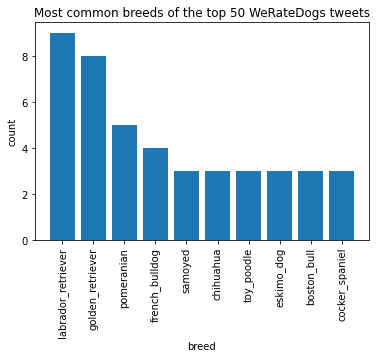

In [101]:
x = top_10_breeds.index
y = top_10_breeds['total']
plt.xticks(rotation=90)
plt.xlabel('breed')
plt.ylabel('count')
plt.title('Most common breeds of the top 50 WeRateDogs tweets')
plt.bar(x, y);

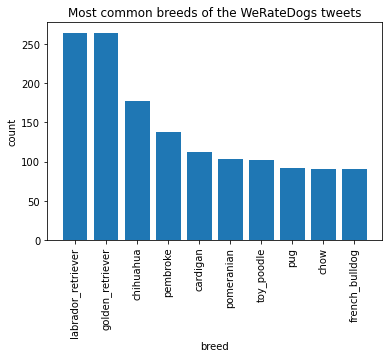

In [102]:
x = top_10_all_breeds.index
y = top_10_all_breeds['total']
plt.xticks(rotation=90)
plt.xlabel('breed')
plt.ylabel('count')
plt.title('Most common breeds of the WeRateDogs tweets')
plt.bar(x, y);

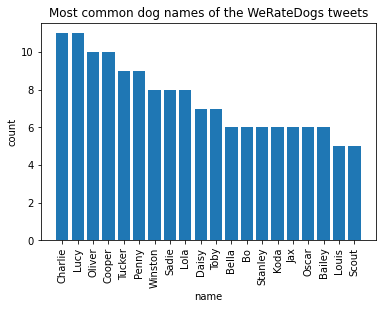

In [103]:
x = top20_names.index
y = top20_names
plt.xticks(rotation=90)
plt.xlabel('name')
plt.ylabel('count')
plt.title('Most common dog names of the WeRateDogs tweets')
plt.bar(x, y);

The most favorite tweet!

In [104]:
print(top_tweets_50['text'][0])

Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4


<blockquote class="twitter-tweet"><p lang="en" dir="ltr">Here&#39;s a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) <a href="https://t.co/7wE9LTEXC4">pic.twitter.com/7wE9LTEXC4</a></p>&mdash; WeRateDogs® (@dog_rates) <a href="https://twitter.com/dog_rates/status/744234799360020481?ref_src=twsrc%5Etfw">June 18, 2016</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>

<img src="https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg" alt="no1_tweet" />

Here's the 2nd most favorite tweet!

In [105]:
print(top_tweets_50['text'][1])

Here's a super supportive puppo participating in the Toronto  #WomensMarch today. 13/10 https://t.co/nTz3FtorBc


<blockquote class="twitter-tweet"><p lang="en" dir="ltr">Here&#39;s a super supportive puppo participating in the Toronto <a href="https://twitter.com/hashtag/WomensMarch?src=hash&amp;ref_src=twsrc%5Etfw">#WomensMarch</a> today. 13/10 <a href="https://t.co/nTz3FtorBc">pic.twitter.com/nTz3FtorBc</a></p>&mdash; WeRateDogs® (@dog_rates) <a href="https://twitter.com/dog_rates/status/822872901745569793?ref_src=twsrc%5Etfw">January 21, 2017</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>

<img src="https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg" alt="no2_tweet" />

And the 3rd most favorite tweet:

In [106]:
print(top_tweets_50['text'][2])

This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d


<blockquote class="twitter-tweet"><p lang="en" dir="ltr">This is Stephan. He just wants to help. 13/10 such a good boy <a href="https://t.co/DkBYaCAg2d">pic.twitter.com/DkBYaCAg2d</a></p>&mdash; WeRateDogs® (@dog_rates) <a href="https://twitter.com/dog_rates/status/807106840509214720?ref_src=twsrc%5Etfw">December 9, 2016</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>

<img src="https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg" alt="no3_tweet" />